In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from modules.fm_functions import *

In [61]:
# raw data
team_data_2023_raw = pd.read_csv('data/2023_FBRef_teams.csv', index_col=0)
team_data_2023_raw.index = team_data_2023_raw.index + '_2023'
team_data_2022_raw = pd.read_csv('data/2022_FBRef_teams.csv', index_col=0)
team_data_2022_raw.index = team_data_2022_raw.index + '_2022'

In [75]:
team_data_raw = pd.concat([team_data_2022_raw, team_data_2023_raw])

In [81]:
from sklearn.preprocessing import MinMaxScaler
team_data_scaled = MinMaxScaler().fit_transform(team_data_raw)
team_data_scaled = pd.DataFrame(team_data_scaled, index=team_data_raw.index, columns=team_data_raw.columns)

In [82]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

similarity_matrix_raw = cosine_similarity(team_data_scaled)
# similarity_matrix_raw = euclidean_distances(team_data_2023_scaled)
similarity_matrix_raw = pd.DataFrame(similarity_matrix, index=team_data_scaled.index, columns=team_data_scaled.index)

In [100]:
similarity_matrix_raw.loc['Brighton_2022'].sort_values(ascending=False)[1:21]
# similarity_matrix_raw.loc['Liverpool'].sort_values(ascending=True)[1:21]

_Squad_
Arsenal_2023          0.975582
Milan_2023            0.972851
Real Madrid_2023      0.972046
Barcelona_2023        0.971926
Napoli_2023           0.970407
Bayern Munich_2022    0.970058
Napoli_2022           0.967955
Arsenal_2022          0.967243
Liverpool_2023        0.967188
Barcelona_2022        0.967079
Liverpool_2022        0.965175
Stuttgart_2023        0.963775
Bayern Munich_2023    0.963452
Lille_2022            0.963250
Tottenham_2023        0.960398
RB Leipzig_2023       0.957637
Leverkusen_2023       0.956952
Lyon_2023             0.956770
Dortmund_2022         0.956019
Newcastle Utd_2023    0.954725
Name: Brighton_2022, dtype: float64

<Axes: >

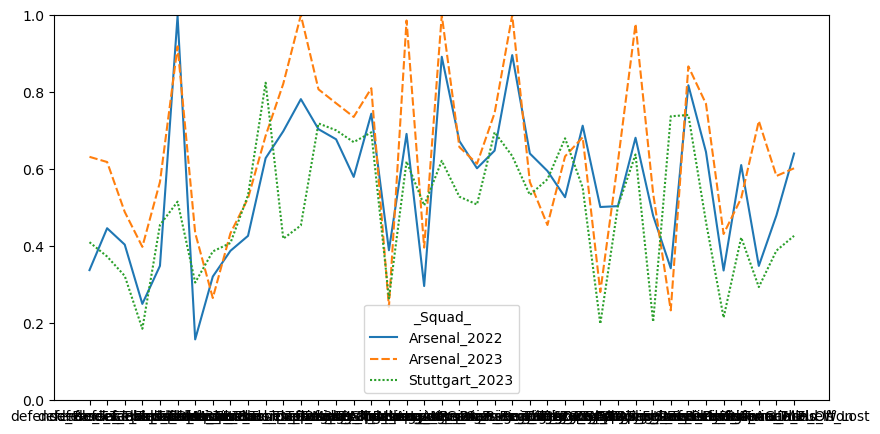

In [135]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
sns.lineplot(data=team_data_scaled.loc[['Arsenal_2022', 'Arsenal_2023', 'Stuttgart_2023']].T, ax=ax)

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [128]:
team_data_pca = pd.DataFrame(index=team_data_scaled.index)
pca_types_dict = {}
explained_variance_total = 0

for column_group in stat_types_dict.keys():
        current_columns = stat_types_dict[column_group]
        pca_result = pca.fit_transform(team_data_scaled[current_columns])
        pca_names = f'{column_group}_' + pca.get_feature_names_out()
        pca_types_dict[column_group] = pca_names.tolist()
        team_data_pca[pca_names] = pca_result
        explained_variance_total += pca.explained_variance_ratio_

explained_variance_total /= len(pca_types_dict)
explained_variance_total[0]

0.6634645255121862

In [149]:
team_data_pca_scaled = MinMaxScaler().fit_transform(team_data_pca)
team_data_pca_scaled = pd.DataFrame(team_data_pca_scaled, index=team_data_pca.index, columns=team_data_pca.columns)

<Axes: >

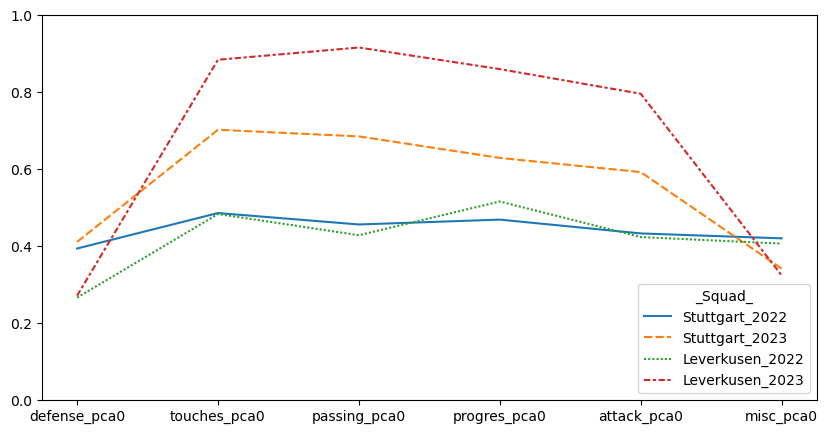

In [155]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0, 1)
sns.lineplot(data=team_data_pca_scaled.loc[['Stuttgart_2022', 'Stuttgart_2023',
                                            'Leverkusen_2022', 'Leverkusen_2023']].T, ax=ax)

In [146]:
MinMaxScaler().fit_transform(team_data_pca)

array([[0.39945152, 0.20921079, 0.17980471, 0.28633805, 0.04847916,
        0.53093121],
       [0.21549982, 0.20458175, 0.15662789, 0.19309013, 0.19649015,
        0.22088169],
       [0.26573943, 0.21594316, 0.20813224, 0.47033048, 0.09617636,
        0.19431011],
       ...,
       [1.        , 0.62099815, 0.45495422, 0.55048673, 0.60877754,
        0.79326687],
       [0.3500676 , 0.33740262, 0.30846975, 0.21989131, 0.23237816,
        0.33591751],
       [0.81682549, 0.63096259, 0.4533884 , 0.57761146, 0.41187693,
        0.56353001]])